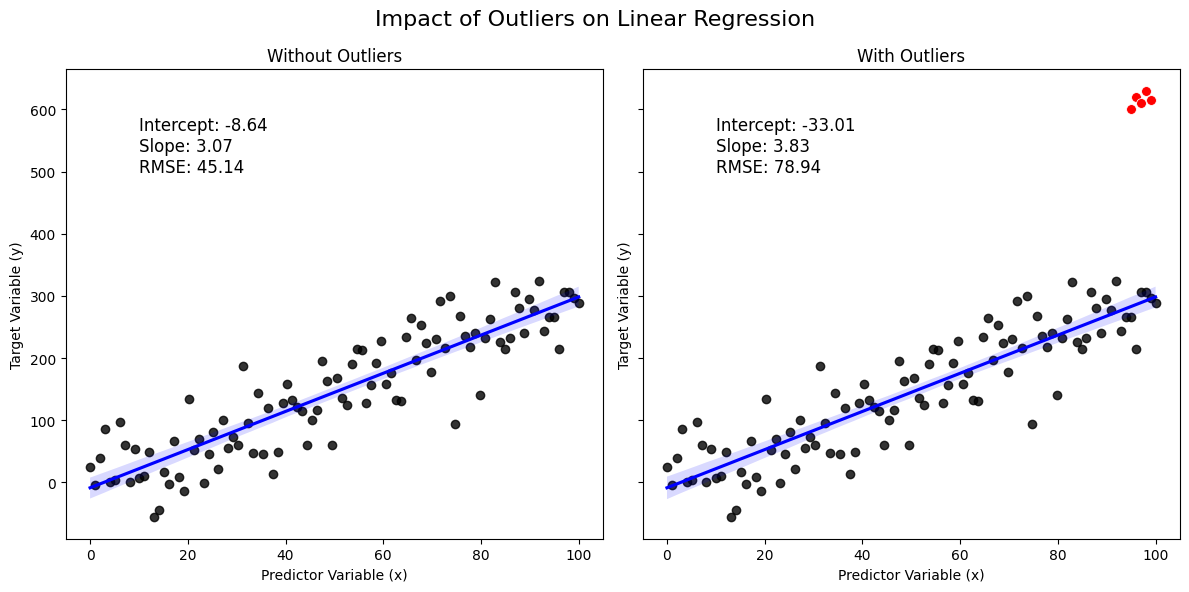

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data for the "Without Outliers" plot
np.random.seed(42)
x = np.linspace(0, 100, 100).reshape(-1, 1)
y = 3 * x.flatten() + np.random.normal(0, 50, size=100)

# Create a DataFrame without outliers
df_no_outliers = pd.DataFrame({'x': x.flatten(), 'y': y})

# Add outliers for the "With Outliers" plot
x_outliers = np.append(x.flatten(), [95, 96, 97, 98, 99]).reshape(-1, 1)
y_outliers = np.append(y, [600, 620, 610, 630, 615])

# Create a DataFrame with outliers
df_with_outliers = pd.DataFrame({'x': x_outliers.flatten(), 'y': y_outliers})
df_with_outliers['outlier'] = ['no'] * 100 + ['yes'] * 5  # Mark outliers

# Perform linear regression without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(df_no_outliers[['x']], df_no_outliers['y'])
y_pred_no_outliers = model_no_outliers.predict(df_no_outliers[['x']])
rmse_no_outliers = np.sqrt(mean_squared_error(df_no_outliers['y'], y_pred_no_outliers))

# Perform linear regression with outliers
model_with_outliers = LinearRegression()
model_with_outliers.fit(df_with_outliers[['x']], df_with_outliers['y'])
y_pred_with_outliers = model_with_outliers.predict(df_with_outliers[['x']])
rmse_with_outliers = np.sqrt(mean_squared_error(df_with_outliers['y'], y_pred_with_outliers))

# Create the side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot without outliers
sns.regplot(data=df_no_outliers, x='x', y='y', scatter_kws={'color': 'black'}, line_kws={'color': 'blue'}, ax=axes[0])
axes[0].set_title('Without Outliers')
axes[0].text(10, 500, f'Intercept: {model_no_outliers.intercept_:.2f}\nSlope: {model_no_outliers.coef_[0]:.2f}\nRMSE: {rmse_no_outliers:.2f}', fontsize=12)

# Plot with outliers
sns.regplot(data=df_with_outliers[df_with_outliers['outlier'] == 'no'], x='x', y='y', scatter_kws={'color': 'black'}, line_kws={'color': 'blue'}, ax=axes[1])
sns.scatterplot(data=df_with_outliers[df_with_outliers['outlier'] == 'yes'], x='x', y='y', color='red', s=50, ax=axes[1])
axes[1].set_title('With Outliers')
axes[1].text(10, 500, f'Intercept: {model_with_outliers.intercept_:.2f}\nSlope: {model_with_outliers.coef_[0]:.2f}\nRMSE: {rmse_with_outliers:.2f}', fontsize=12)

# Set labels
for ax in axes:
    ax.set_xlabel('Predictor Variable (x)')
    ax.set_ylabel('Target Variable (y)')

plt.suptitle('Impact of Outliers on Linear Regression', fontsize=16)
plt.tight_layout()
plt.show()


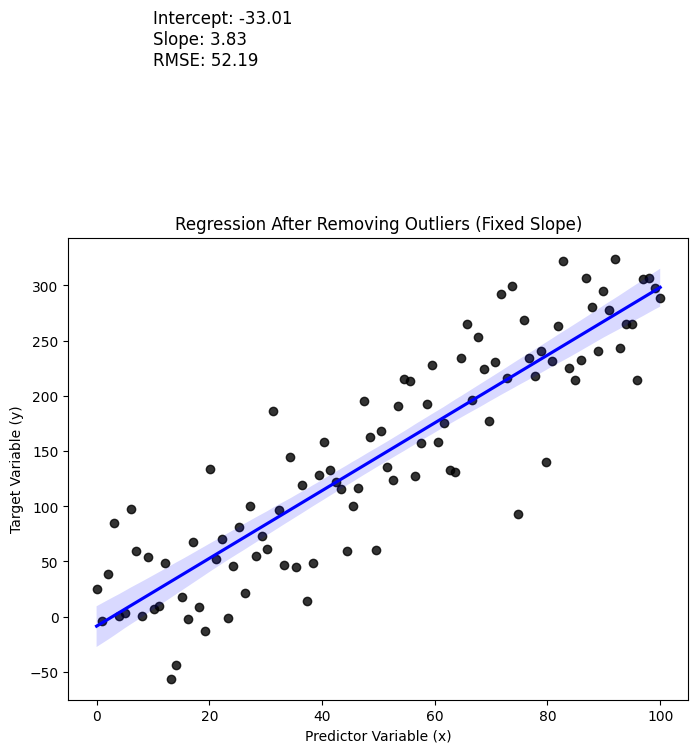

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data for the "Without Outliers" plot
np.random.seed(42)
x = np.linspace(0, 100, 100).reshape(-1, 1)
y = 3 * x.flatten() + np.random.normal(0, 50, size=100)

# Add outliers for the "With Outliers" plot
x_outliers = np.append(x.flatten(), [95, 96, 97, 98, 99]).reshape(-1, 1)
y_outliers = np.append(y, [600, 620, 610, 630, 615])

# Create a DataFrame with outliers
df_with_outliers = pd.DataFrame({'x': x_outliers.flatten(), 'y': y_outliers})
df_with_outliers['outlier'] = ['no'] * 100 + ['yes'] * 5  # Mark outliers

# Fit linear regression to data with outliers to obtain slope
model_with_outliers = LinearRegression()
model_with_outliers.fit(df_with_outliers[['x']], df_with_outliers['y'])
slope_with_outliers = model_with_outliers.coef_[0]
intercept_with_outliers = model_with_outliers.intercept_

# Remove the outliers from the dataset
df_cleaned = df_with_outliers[df_with_outliers['outlier'] == 'no']

# Predict using the learned slope and intercept from data with outliers
y_pred_cleaned = slope_with_outliers * df_cleaned['x'] + intercept_with_outliers
rmse_cleaned = np.sqrt(mean_squared_error(df_cleaned['y'], y_pred_cleaned))

# Plot the cleaned data with the slope obtained earlier
plt.figure(figsize=(8, 6))
sns.regplot(data=df_cleaned, x='x', y='y', scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})
plt.title('Regression After Removing Outliers (Fixed Slope)')
plt.text(10, 500, f'Intercept: {intercept_with_outliers:.2f}\nSlope: {slope_with_outliers:.2f}\nRMSE: {rmse_cleaned:.2f}', fontsize=12)

# Set labels
plt.xlabel('Predictor Variable (x)')
plt.ylabel('Target Variable (y)')

plt.show()
